### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from tabulate import tabulate
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import joblib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Load the dataset

In [2]:
df = pd.read_csv('ChurnData (1).csv')

In [3]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [37]:
print(df.head().to_string())

   tenure   age  address  income   ed  employ  equip  callcard  wireless  longmon  tollmon  equipmon  cardmon  wiremon  longten  tollten  cardten  voice  pager  internet  callwait  confer  ebill  loglong  logtoll  lninc  custcat  churn
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0     4.40    20.75       0.0    15.25     35.7    42.00   211.45    125.0    1.0    1.0       0.0       1.0     1.0    0.0    1.482    3.033  4.913      4.0    1.0
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0     9.45     0.00       0.0     0.00      0.0   288.80     0.00      0.0    0.0    0.0       0.0       0.0     0.0    0.0    2.246    3.240  3.497      1.0    1.0
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0     6.30     0.00       0.0     0.00      0.0   157.05     0.00      0.0    0.0    0.0       0.0       0.0     1.0    0.0    1.841    3.240  3.401      3.0    0.0
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0    

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [39]:
df.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

### Feature Selection using the Pearson Correlation

In [40]:
if 'churn' not in df.columns:
    raise ValueError("Column 'churn' not found in df4. Please check column names.")
df_ct = df.drop(columns=['churn'])

selected_vars = []
for var in df_ct.columns:
    if df_ct[var].isna().sum() == 0 and pd.api.types.is_numeric_dtype(df_ct[var]):
        corr_coeff, p_value = pearsonr(df_ct[var], df['churn'])
        if p_value < 0.05:
            selected_vars.append({
                'Variable': var,
                'Correlation_Coefficient': round(corr_coeff, 4),
                'P_value': round(p_value, 4)
            })
selected_vars_df = pd.DataFrame(selected_vars)
sorted_data = selected_vars_df.sort_values(by='Correlation_Coefficient', ascending=False)
if not sorted_data.empty:
    print(tabulate(sorted_data, headers='keys', tablefmt='github', showindex=False))
else:
    print("No variables found with statistically significant correlation (p < 0.05) to 'Price (Ksh)'.")


| Variable   |   Correlation_Coefficient |   P_value |
|------------|---------------------------|-----------|
| equip      |                    0.2753 |    0.0001 |
| equipmon   |                    0.2553 |    0.0003 |
| internet   |                    0.2548 |    0.0003 |
| ebill      |                    0.2548 |    0.0003 |
| ed         |                    0.2161 |    0.0021 |
| wiremon    |                    0.1775 |    0.0119 |
| wireless   |                    0.1744 |    0.0135 |
| voice      |                    0.1423 |    0.0444 |
| cardmon    |                   -0.1772 |    0.0121 |
| cardten    |                   -0.2286 |    0.0011 |
| address    |                   -0.2607 |    0.0002 |
| age        |                   -0.2877 |    0      |
| longmon    |                   -0.292  |    0      |
| longten    |                   -0.2949 |    0      |
| callcard   |                   -0.3115 |    0      |
| loglong    |                   -0.3369 |    0      |
| employ  

### Define the Selected Features

In [41]:
selected_vars = ["equip","equipmon","internet","ebill","ed", "wiremon","wireless",
                 "voice","cardmon","cardten", "address","age","longmon","longten",
                 "callcard","loglong","employ","tenure"]

In [42]:
df2 = df[selected_vars + ['churn']]

In [43]:
df2.columns

Index(['equip', 'equipmon', 'internet', 'ebill', 'ed', 'wiremon', 'wireless',
       'voice', 'cardmon', 'cardten', 'address', 'age', 'longmon', 'longten',
       'callcard', 'loglong', 'employ', 'tenure', 'churn'],
      dtype='object')

### Define the Response and Predictor variables

In [44]:
target = 'churn'
X = df2[selected_vars]
y = df2[target]

### Split the dataset into train and test data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models

In [46]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVC': SVC()
}

### Evaluate the models

In [47]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    result = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    }
    results.append(result)
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression     0.700   0.285714  0.222222  0.250000  0.802867
1        Random Forest     0.775   0.500000  0.333333  0.400000  0.806452
2              XGBoost     0.725   0.375000  0.333333  0.352941  0.702509
3                  SVC     0.775   0.000000  0.000000  0.000000       N/A


### Confusion matrix for the models

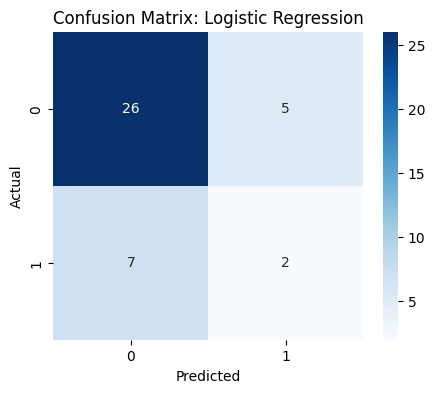

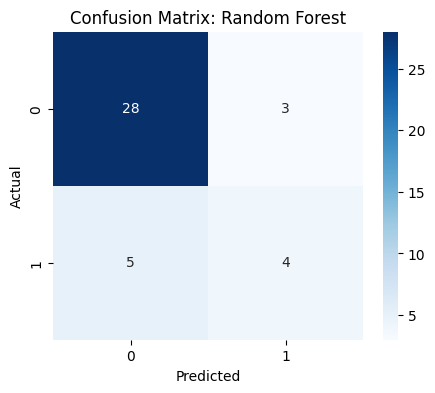

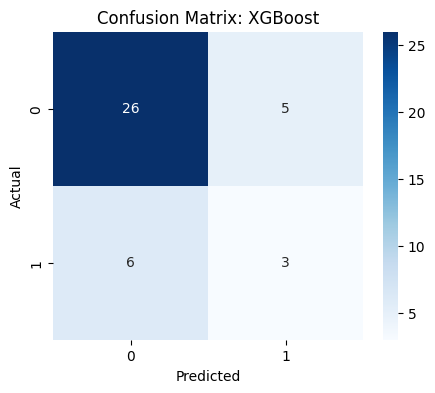

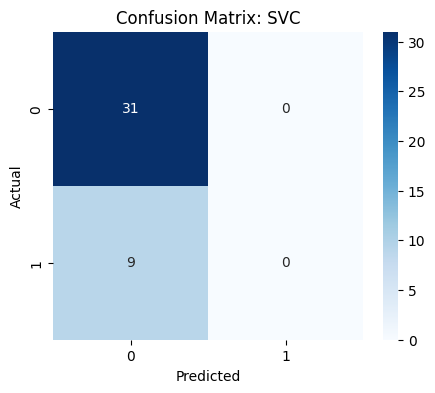

In [48]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### Handle class imbalance With SMOTE

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
final_model = LogisticRegression()
final_model.fit(X_train_res, y_train_res)


LogisticRegression()

### Select Top 10 Features by Absolute Coefficients

In [50]:
coefficients = final_model.coef_[0]
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Importance (abs)': np.abs(coefficients)
})
top_features = importance_df.sort_values(by='Importance (abs)', ascending=False).head(10)['Feature'].values
print("Top 10 features:", top_features)

Top 10 features: ['employ' 'ed' 'address' 'longmon' 'tenure' 'ebill' 'internet' 'callcard'
 'wiremon' 'equipmon']


### Retrain the Model with the selected features

In [51]:
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
top_model = LogisticRegression()
top_model.fit(X_train_top, y_train)

LogisticRegression()

### Tuning the Logistic Regression

In [52]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300]
}
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_top, y_train)
best_log_reg = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


### Evaluate the Model

In [53]:
y_pred_tuned = best_log_reg.predict(X_test_top)
y_pred_proba_tuned = best_log_reg.predict_proba(X_test_top)[:, 1]

In [54]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_tuned), 4))
print("Precision:", round(precision_score(y_test, y_pred_tuned), 4))
print("Recall:", round(recall_score(y_test, y_pred_tuned), 4))
print("F1 Score:", round(f1_score(y_test, y_pred_tuned), 4))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_pred_proba_tuned), 4))

Accuracy: 0.725
Precision: 0.375
Recall: 0.3333
F1 Score: 0.3529
ROC-AUC Score: 0.8244


### Plot ROC Curve

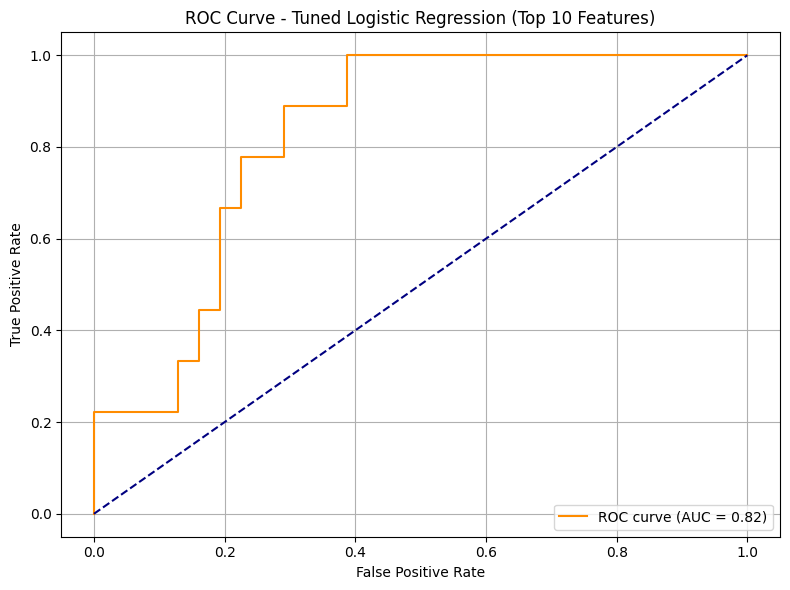

In [55]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_tuned)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Logistic Regression (Top 10 Features)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### Save the model

In [56]:
joblib.dump(best_log_reg, 'logistic_model_top10.pkl')
joblib.dump(top_features, 'Logistic_top_10_features.pkl')
print("Model and Features saved successfully")

Model and Features saved successfully
